In [106]:
import torch
from torch import nn

In [107]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [108]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir , test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random Image Path : data/pizza_steak_sushi/train/pizza/1649276.jpg
Image Class : pizza
Image Height : 384
Image Width : 512


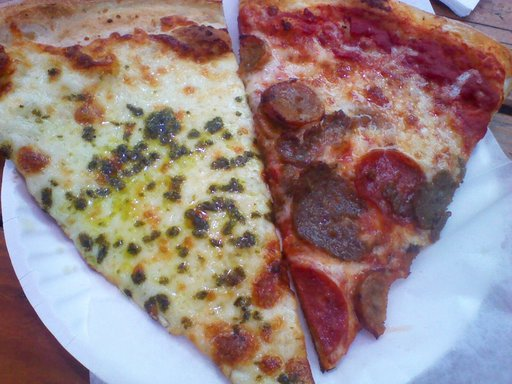

In [189]:
import random
random.seed(42)
from PIL import Image

imagepathlist = list(image_path.glob("*/*/*.jpg")) #* means any combination
randomimagepath = random.choice(imagepathlist)

image_class = randomimagepath.parent.stem #get image class from path name

image = Image.open(randomimagepath)

print(f"Random Image Path : {randomimagepath}")
print(f"Image Class : {image_class}")
print(f"Image Height : {image.height}")
print(f"Image Width : {image.width}")
image

(-0.5, 511.5, 383.5, -0.5)

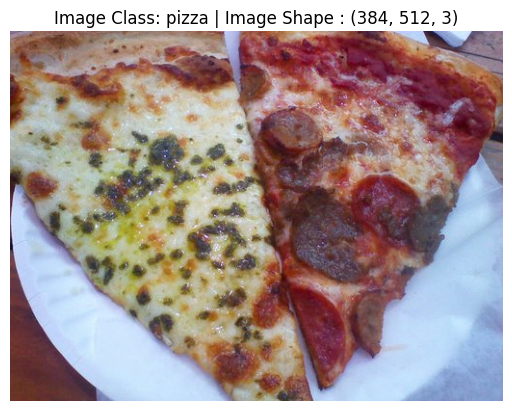

In [110]:
#Doing the same we did with matplotlib
#we need to convert image to numpy array first ... as matplotlib works only with numpy
import numpy as np
import matplotlib.pyplot as plt

imagenumpyarray = np.asarray(image)
plt.imshow(imagenumpyarray)
plt.title(f"Image Class: {image_class} | Image Shape : {imagenumpyarray.shape}")
plt.axis(False)

In [111]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets , transforms

In [112]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5), #making model difficult to learn
    transforms.ToTensor()
])

In [113]:
imagetransformed = data_transform(image).permute(1,2,0)

In [114]:
imagetransformed.shape

torch.Size([64, 64, 3])

Text(0.5, 1.0, 'Image Class : pizza | Image Shape : torch.Size([64, 64, 3])')

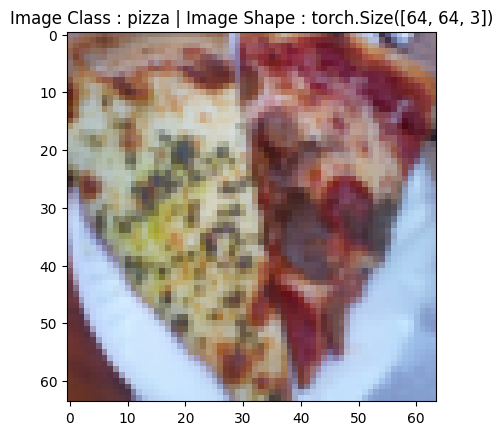

In [115]:
plt.imshow(imagetransformed)
plt.title(f'Image Class : {image_class} | Image Shape : {imagetransformed.shape}')

In [116]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir , transform=data_transform , target_transform = None)
test_data = datasets.ImageFolder(root=test_dir , transform = data_transform , target_transform = None)

In [117]:
train_data , test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [118]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [119]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [120]:
len(train_data) , len(test_data)

(225, 75)

In [121]:
image , label = train_data[0]

In [122]:
image , label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [123]:
image.shape , label

(torch.Size([3, 64, 64]), 0)

Text(0.5, 1.0, 'Class Name : pizza | Class Shape : torch.Size([64, 64, 3])')

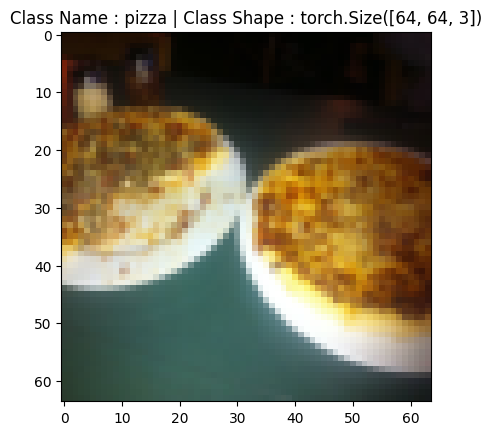

In [124]:
plt.imshow(image.permute(1,2,0))
plt.title(f"Class Name : {class_names[label]} | Class Shape : {image.permute(1,2,0).shape}")

In [125]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data , batch_size=1,shuffle=True)
test_dataloader = DataLoader(dataset=test_data , batch_size=1 , shuffle=False)

In [126]:
train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e0f1583fc70>,
 <torch.utils.data.dataloader.DataLoader at 0x7e0f15797760>)

In [127]:
image , label = next(iter(train_dataloader))
image.shape , label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [128]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn

helper_functions.py already exists, skipping download


In [129]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=10*256,out_features=len(class_names))
    )
  def forward(self , x):
    x=self.block1(x)
    x=self.block2(x)
    x=self.classifier(x)
    return x

model0 = CNN()

In [130]:
model0

CNN(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [131]:
!pip install torchinfo

In [132]:
import torchinfo
from torchinfo import summary

summary(model0 , input_shape=[1,3,64,64])

Layer (type:depth-idx)                   Param #
CNN                                      --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       280
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       910
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       910
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       910
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      7,683
Total params: 10,693
Trainable params: 10,693
Non-trainable params: 0

In [133]:
lossfn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params=model0.parameters(),lr=0.1)

In [134]:
torch.manual_seed(42)

epochs = 10

for epoch in range(epochs):

    trainloss = 0
    trainacc = 0
    for batch, (x, y) in enumerate(train_dataloader):
        model0.train()

        ypred = model0(x)

        loss = lossfn(ypred, y)
        trainloss += loss
        trainacc += accuracy_fn(y_true=y, y_pred=ypred.argmax(dim=1))

        optimiser.zero_grad()

        loss.backward()

        optimiser.step()

    trainloss /= len(train_dataloader)
    trainacc /= len(train_dataloader)

    testloss, testacc = 0, 0
    model0.eval()
    with torch.inference_mode():
        for x, y in test_dataloader:

            testpred = model0(x)

            testloss += lossfn(testpred, y)

            testacc += accuracy_fn(y_true=y, y_pred=testpred.argmax(dim=1))

        testloss /= len(test_dataloader)

        testacc /= len(test_dataloader)

    print(f"Train loss: {trainloss} | Test loss: {testloss} | Train Accuracy : {trainacc} | Test Accuracy : {testacc} ")


Train loss: 1.126918911933899 | Test loss: 1.1536115407943726 | Train Accuracy : 33.77777777777778 | Test Accuracy : 33.333333333333336 
Train loss: 1.121551513671875 | Test loss: 1.1164631843566895 | Train Accuracy : 36.0 | Test Accuracy : 33.333333333333336 
Train loss: 1.1213325262069702 | Test loss: 1.097375512123108 | Train Accuracy : 29.77777777777778 | Test Accuracy : 33.333333333333336 
Train loss: 1.1253716945648193 | Test loss: 1.0914851427078247 | Train Accuracy : 28.88888888888889 | Test Accuracy : 41.333333333333336 
Train loss: 1.1102393865585327 | Test loss: 1.1180825233459473 | Train Accuracy : 34.22222222222222 | Test Accuracy : 33.333333333333336 
Train loss: 1.1196184158325195 | Test loss: 1.122135043144226 | Train Accuracy : 36.44444444444444 | Test Accuracy : 33.333333333333336 
Train loss: 1.1166915893554688 | Test loss: 1.111202597618103 | Train Accuracy : 35.55555555555556 | Test Accuracy : 33.333333333333336 
Train loss: 1.1151903867721558 | Test loss: 1.152333

In [135]:
#model not performing well

In [136]:
#using trivial augment wide to zoom the image

In [137]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])


test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64))
])

In [138]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir , transform=data_transform , target_transform = None)
test_data = datasets.ImageFolder(root=test_dir , transform = data_transform , target_transform = None)

In [139]:
train_data , test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [140]:
image , label = train_data[0]

In [141]:
image.shape , label

(torch.Size([3, 64, 64]), 0)

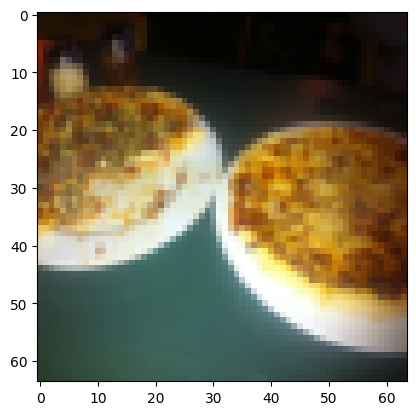

In [142]:
plt.imshow(image.permute(1,2,0))

In [143]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data , batch_size=1,shuffle=True)
test_dataloader = DataLoader(dataset=test_data , batch_size=1 , shuffle=False)

In [144]:
train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e0f156ebbb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e0f15856e60>)

In [145]:
image , label = next(iter(train_dataloader))
image.shape , label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [146]:
class CNN1(nn.Module):
  def __init__(self):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=10*256,out_features=len(class_names))
    )
  def forward(self , x):
    x=self.block1(x)
    x=self.block2(x)
    x=self.classifier(x)
    return x

model1 = CNN1()

In [147]:
model1

CNN1(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [148]:
lossfn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params=model1.parameters(),lr=0.1)

In [149]:
torch.manual_seed(42)

epochs = 10

for epoch in range(epochs):

    trainloss = 0
    trainacc = 0
    for batch, (x, y) in enumerate(train_dataloader):
        model1.train()

        ypred = model1(x)

        loss = lossfn(ypred, y)
        trainloss += loss
        trainacc += accuracy_fn(y_true=y, y_pred=ypred.argmax(dim=1))

        optimiser.zero_grad()

        loss.backward()

        optimiser.step()

    trainloss /= len(train_dataloader)
    trainacc /= len(train_dataloader)

    testloss, testacc = 0, 0
    model1.eval()
    with torch.inference_mode():
        for x, y in test_dataloader:

            testpred = model1(x)

            testloss += lossfn(testpred, y)

            testacc += accuracy_fn(y_true=y, y_pred=testpred.argmax(dim=1))

        testloss /= len(test_dataloader)

        testacc /= len(test_dataloader)

    print(f"Train loss: {trainloss} | Test loss: {testloss} | Train Accuracy : {trainacc} | Test Accuracy : {testacc} ")

Train loss: 1.1381710767745972 | Test loss: 1.153620958328247 | Train Accuracy : 33.77777777777778 | Test Accuracy : 33.333333333333336 
Train loss: 1.1215523481369019 | Test loss: 1.1164631843566895 | Train Accuracy : 36.0 | Test Accuracy : 33.333333333333336 
Train loss: 1.1213325262069702 | Test loss: 1.097375512123108 | Train Accuracy : 29.77777777777778 | Test Accuracy : 33.333333333333336 
Train loss: 1.1253716945648193 | Test loss: 1.0914851427078247 | Train Accuracy : 28.88888888888889 | Test Accuracy : 41.333333333333336 
Train loss: 1.1102393865585327 | Test loss: 1.1180825233459473 | Train Accuracy : 34.22222222222222 | Test Accuracy : 33.333333333333336 
Train loss: 1.1196184158325195 | Test loss: 1.122135043144226 | Train Accuracy : 36.44444444444444 | Test Accuracy : 33.333333333333336 
Train loss: 1.1166915893554688 | Test loss: 1.111202597618103 | Train Accuracy : 35.55555555555556 | Test Accuracy : 33.333333333333336 
Train loss: 1.1151903867721558 | Test loss: 1.15233

In [150]:
#model still not performing well

In [151]:
trainloss , trainacc , testloss , testacc

(tensor(1.1188, grad_fn=<DivBackward0>),
 32.44444444444444,
 tensor(1.1330),
 25.333333333333332)

In [152]:
#making prediction on custom image

In [153]:
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

data/04-pizza-dad.jpeg already exists, skipping download.


In [154]:
import torchvision
customimage = torchvision.io.read_image(str(custom_image_path))
# customimage = Image.open(str(custom_image_path))

Text(0.5, 1.0, 'Image Shape : torch.Size([3, 4032, 3024])')

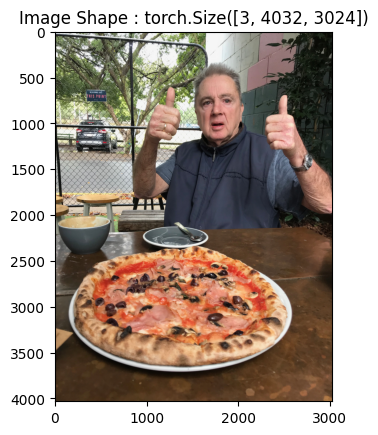

In [155]:
plt.imshow(customimage.permute(1,2,0))
plt.title(f"Image Shape : {customimage.size()}")

In [156]:
import torch.nn.functional as F
target_size = (64,64)
customimagetransform_withbatch = F.interpolate(customimage.unsqueeze(0), size=target_size, mode='bilinear', align_corners=False)

In [157]:
customimagetransform_withbatch.shape

torch.Size([1, 3, 64, 64])

In [158]:
customimagetransform_withoutbatch = customimagetransform_withbatch.squeeze()

In [159]:
# custom_image_transform = transforms.Compose([
#     transforms.Resize(size=(64,64)),
#     transforms.ToTensor()
# ])

In [160]:
# customimagetransform = custom_image_transform(image).permute(1,2,0)

Text(0.5, 1.0, 'Image Shape : torch.Size([3, 64, 64])')

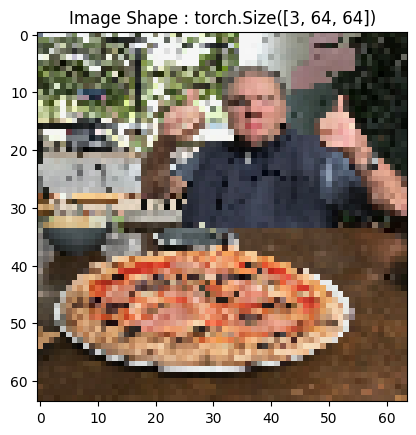

In [161]:
plt.imshow(customimagetransform_withoutbatch.permute(1,2,0))
plt.title(f"Image Shape : {customimagetransform_withoutbatch.size()}")

In [162]:
customimagetransform_withbatchfloat = customimagetransform_withbatch.float()
model0.eval()
with torch.inference_mode():
  customimagepred = model0(customimagetransform_withbatchfloat)

In [163]:
customimagepred

tensor([[-12.2172,  41.9791, -33.6908]])

In [164]:
customimagesoftmax = torch.softmax(customimagepred , dim=1)
customimagepredlabel = torch.argmax(customimagesoftmax , dim=1)

In [165]:
customimagepredlabel

tensor([1])

In [166]:
customimagepredclass = class_names[customimagepredlabel]
customimagepredclass

'steak'

In [166]:
#model predicting poorly

In [ ]:
# reducing underfitting with the same model using:
# 1 adam optimiser with learning rate of 0.001
# 2 doubling the hidden units
# 3 training the model with 20 epochs
# 4 doubling the data

In [231]:
import torch
from torch import nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [232]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data (images from GitHub)
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
  print(f"Unzipping pizza, steak, sushi data to {image_path}")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.
Unzipping pizza, steak, sushi data to data/pizza_steak_sushi


In [233]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [234]:
train_dir , test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random Image Path : data/pizza_steak_sushi/test/sushi/3837522.jpg
Image Class : sushi
Image Height : 512
Image Width : 512


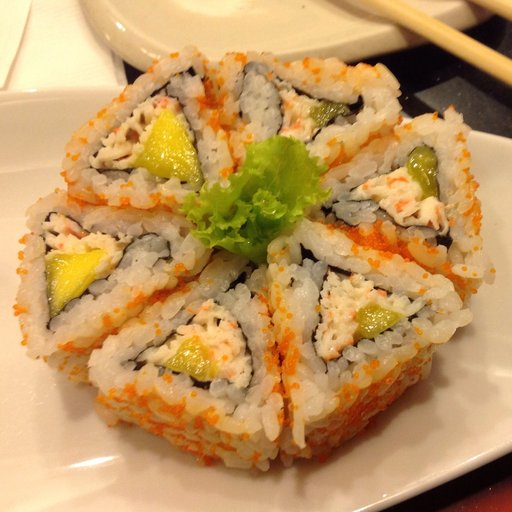

In [235]:
import random
random.seed(10)
from PIL import Image

imagepathlist = list(image_path.glob("*/*/*.jpg")) #* means any combination
randomimagepath = random.choice(imagepathlist)

image_class = randomimagepath.parent.stem #get image class from path name

image = Image.open(randomimagepath)

print(f"Random Image Path : {randomimagepath}")
print(f"Image Class : {image_class}")
print(f"Image Height : {image.height}")
print(f"Image Width : {image.width}")
image

Text(0.5, 1.0, 'Image Class : sushi | Image Shape : (512, 512, 3)')

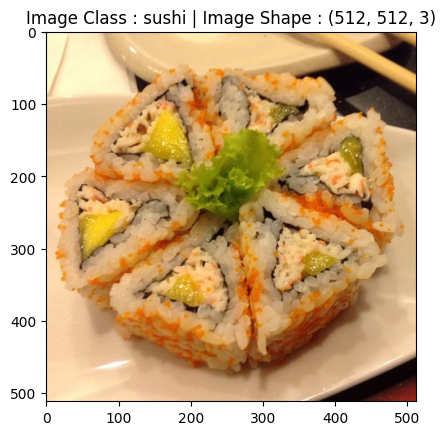

In [236]:
#importing same image using matplotlib
imagenumpyarray = np.asarray(image)
plt.imshow(imagenumpyarray)
plt.title(f"Image Class : {image_class} | Image Shape : {imagenumpyarray.shape}")

In [237]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets , transforms

In [238]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [239]:
imagetransformed = data_transform(image).permute(1,2,0)

In [240]:
imagetransformed.shape

torch.Size([64, 64, 3])

In [241]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir , transform = data_transform , target_transform=None)
test_data = datasets.ImageFolder(root=test_dir , transform = data_transform , target_transform=None)

In [242]:
train_data , test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [243]:
class_names = train_data.classes

In [244]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [245]:
len(train_data) , len(test_data)

(225, 75)

In [246]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data , batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_data , batch_size=1,shuffle=False)

In [247]:
train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e0f31369210>,
 <torch.utils.data.dataloader.DataLoader at 0x7e0f3136b130>)

In [248]:
len(train_dataloader) , len(test_dataloader)

(225, 75)

In [249]:
image , label = next(iter(train_dataloader))

In [250]:
image.shape , label

(torch.Size([1, 3, 64, 64]), tensor([1]))

In [251]:
class_names[label]

'steak'

In [284]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=10*256,out_features=len(class_names))
    )
  def forward(self , x):
    x=self.block1(x)
    x=self.block2(x)
    x=self.classifier(x)
    return x

model0 = CNN()

In [285]:
model0

CNN(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [263]:
#using adam optimiser with learning rate = 0.001 and training model0 with 20 epochs and 50 epochs
lossfn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(params=model0.parameters(),lr=0.001)

In [255]:
#training the same model0 with 20 epochs
torch.manual_seed(42)

epochs = 20

for epoch in range(epochs):

    trainloss = 0
    trainacc = 0
    for batch, (x, y) in enumerate(train_dataloader):
        model0.train()

        ypred = model0(x)

        loss = lossfn(ypred, y)
        trainloss += loss
        trainacc += accuracy_fn(y_true=y, y_pred=ypred.argmax(dim=1))

        optimiser.zero_grad()

        loss.backward()

        optimiser.step()

    trainloss /= len(train_dataloader)
    trainacc /= len(train_dataloader)

    testloss, testacc = 0, 0
    model0.eval()
    with torch.inference_mode():
        for x, y in test_dataloader:

            testpred = model0(x)

            testloss += lossfn(testpred, y)

            testacc += accuracy_fn(y_true=y, y_pred=testpred.argmax(dim=1))

        testloss /= len(test_dataloader)

        testacc /= len(test_dataloader)

    print(f"Train loss: {trainloss} | Test loss: {testloss} | Train Accuracy : {trainacc} | Test Accuracy : {testacc} ")

Train loss: 1.1011097431182861 | Test loss: 1.100117564201355 | Train Accuracy : 26.666666666666668 | Test Accuracy : 25.333333333333332 
Train loss: 1.1004267930984497 | Test loss: 1.1006171703338623 | Train Accuracy : 30.666666666666668 | Test Accuracy : 25.333333333333332 
Train loss: 1.0999265909194946 | Test loss: 1.1007987260818481 | Train Accuracy : 33.333333333333336 | Test Accuracy : 25.333333333333332 
Train loss: 1.099452257156372 | Test loss: 1.1007447242736816 | Train Accuracy : 33.333333333333336 | Test Accuracy : 25.333333333333332 
Train loss: 1.0994359254837036 | Test loss: 1.1008838415145874 | Train Accuracy : 33.333333333333336 | Test Accuracy : 25.333333333333332 
Train loss: 1.0990599393844604 | Test loss: 1.100968599319458 | Train Accuracy : 33.333333333333336 | Test Accuracy : 25.333333333333332 
Train loss: 1.0990833044052124 | Test loss: 1.1011126041412354 | Train Accuracy : 32.0 | Test Accuracy : 25.333333333333332 
Train loss: 1.0989978313446045 | Test loss: 

In [256]:
#model accuracy did not increase much with 20 epochs

In [257]:
#training the same model0 with 50 epochs
torch.manual_seed(42)

epochs = 20

for epoch in range(epochs):

    trainloss = 0
    trainacc = 0
    for batch, (x, y) in enumerate(train_dataloader):
        model0.train()

        ypred = model0(x)

        loss = lossfn(ypred, y)
        trainloss += loss
        trainacc += accuracy_fn(y_true=y, y_pred=ypred.argmax(dim=1))

        optimiser.zero_grad()

        loss.backward()

        optimiser.step()

    trainloss /= len(train_dataloader)
    trainacc /= len(train_dataloader)

    testloss, testacc = 0, 0
    model0.eval()
    with torch.inference_mode():
        for x, y in test_dataloader:

            testpred = model0(x)

            testloss += lossfn(testpred, y)

            testacc += accuracy_fn(y_true=y, y_pred=testpred.argmax(dim=1))

        testloss /= len(test_dataloader)

        testacc /= len(test_dataloader)

    print(f"Train loss: {trainloss} | Test loss: {testloss} | Train Accuracy : {trainacc} | Test Accuracy : {testacc} ")

Train loss: 1.0988845825195312 | Test loss: 1.1021000146865845 | Train Accuracy : 34.666666666666664 | Test Accuracy : 33.333333333333336 
Train loss: 1.0988495349884033 | Test loss: 1.1026180982589722 | Train Accuracy : 34.666666666666664 | Test Accuracy : 33.333333333333336 
Train loss: 1.0987857580184937 | Test loss: 1.1026629209518433 | Train Accuracy : 34.666666666666664 | Test Accuracy : 33.333333333333336 
Train loss: 1.0986157655715942 | Test loss: 1.1025699377059937 | Train Accuracy : 34.666666666666664 | Test Accuracy : 33.333333333333336 
Train loss: 1.0988447666168213 | Test loss: 1.1024881601333618 | Train Accuracy : 34.666666666666664 | Test Accuracy : 33.333333333333336 
Train loss: 1.0986539125442505 | Test loss: 1.1024128198623657 | Train Accuracy : 34.666666666666664 | Test Accuracy : 33.333333333333336 
Train loss: 1.0988025665283203 | Test loss: 1.1024411916732788 | Train Accuracy : 34.666666666666664 | Test Accuracy : 33.333333333333336 
Train loss: 1.0987992286682

In [258]:
#model accuracy did not increase much with 50 epochs

In [261]:
#doubling the number of hidden units then training with adam optimiser with lr = 0.001 with 20 epochs
class CNNmodified(nn.Module):
  def __init__(self):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels=3,out_channels=20,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=20,out_channels=20,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels=20,out_channels=20,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=20,out_channels=20,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=20*256,out_features=len(class_names))
    )
  def forward(self , x):
    x=self.block1(x)
    x=self.block2(x)
    x=self.classifier(x)
    return x

model3 = CNNmodified()

In [262]:
model3

CNN(
  (block1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5120, out_features=3, bias=True)
  )
)

In [266]:
lossfn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(params=model3.parameters(),lr=0.001)

In [267]:
#training model3 with 20 epochs
torch.manual_seed(42)

epochs = 20

for epoch in range(epochs):

    trainloss = 0
    trainacc = 0
    for batch, (x, y) in enumerate(train_dataloader):
        model3.train()

        ypred = model3(x)

        loss = lossfn(ypred, y)
        trainloss += loss
        trainacc += accuracy_fn(y_true=y, y_pred=ypred.argmax(dim=1))

        optimiser.zero_grad()

        loss.backward()

        optimiser.step()

    trainloss /= len(train_dataloader)
    trainacc /= len(train_dataloader)

    testloss, testacc = 0, 0
    model3.eval()
    with torch.inference_mode():
        for x, y in test_dataloader:

            testpred = model3(x)

            testloss += lossfn(testpred, y)

            testacc += accuracy_fn(y_true=y, y_pred=testpred.argmax(dim=1))

        testloss /= len(test_dataloader)

        testacc /= len(test_dataloader)

    print(f"Train loss: {trainloss} | Test loss: {testloss} | Train Accuracy : {trainacc} | Test Accuracy : {testacc} ")

Train loss: 1.1066126823425293 | Test loss: 1.101396918296814 | Train Accuracy : 31.11111111111111 | Test Accuracy : 25.333333333333332 
Train loss: 1.099290132522583 | Test loss: 1.1019359827041626 | Train Accuracy : 29.77777777777778 | Test Accuracy : 25.333333333333332 
Train loss: 1.1009471416473389 | Test loss: 1.1019721031188965 | Train Accuracy : 27.11111111111111 | Test Accuracy : 25.333333333333332 
Train loss: 1.09876549243927 | Test loss: 1.1019400358200073 | Train Accuracy : 34.666666666666664 | Test Accuracy : 33.333333333333336 
Train loss: 1.0984970331192017 | Test loss: 1.1029853820800781 | Train Accuracy : 32.888888888888886 | Test Accuracy : 33.333333333333336 
Train loss: 1.103667974472046 | Test loss: 1.101680874824524 | Train Accuracy : 31.555555555555557 | Test Accuracy : 33.333333333333336 
Train loss: 1.1018033027648926 | Test loss: 1.1019463539123535 | Train Accuracy : 33.77777777777778 | Test Accuracy : 33.333333333333336 
Train loss: 1.0988327264785767 | Test

In [268]:
#training model3 with 50 epochs
torch.manual_seed(42)

epochs = 50

for epoch in range(epochs):

    trainloss = 0
    trainacc = 0
    for batch, (x, y) in enumerate(train_dataloader):
        model3.train()

        ypred = model3(x)

        loss = lossfn(ypred, y)
        trainloss += loss
        trainacc += accuracy_fn(y_true=y, y_pred=ypred.argmax(dim=1))

        optimiser.zero_grad()

        loss.backward()

        optimiser.step()

    trainloss /= len(train_dataloader)
    trainacc /= len(train_dataloader)

    testloss, testacc = 0, 0
    model3.eval()
    with torch.inference_mode():
        for x, y in test_dataloader:

            testpred = model3(x)

            testloss += lossfn(testpred, y)

            testacc += accuracy_fn(y_true=y, y_pred=testpred.argmax(dim=1))

        testloss /= len(test_dataloader)

        testacc /= len(test_dataloader)

    print(f"Train loss: {trainloss} | Test loss: {testloss} | Train Accuracy : {trainacc} | Test Accuracy : {testacc} ")

Train loss: 1.098881721496582 | Test loss: 1.102207064628601 | Train Accuracy : 34.666666666666664 | Test Accuracy : 33.333333333333336 
Train loss: 1.0988481044769287 | Test loss: 1.1027121543884277 | Train Accuracy : 34.666666666666664 | Test Accuracy : 33.333333333333336 
Train loss: 1.0987844467163086 | Test loss: 1.102742314338684 | Train Accuracy : 34.666666666666664 | Test Accuracy : 33.333333333333336 
Train loss: 1.0986149311065674 | Test loss: 1.1026413440704346 | Train Accuracy : 34.666666666666664 | Test Accuracy : 33.333333333333336 
Train loss: 1.0988441705703735 | Test loss: 1.102548599243164 | Train Accuracy : 34.666666666666664 | Test Accuracy : 33.333333333333336 
Train loss: 1.0986546277999878 | Test loss: 1.102464199066162 | Train Accuracy : 34.666666666666664 | Test Accuracy : 33.333333333333336 
Train loss: 1.0988032817840576 | Test loss: 1.102486491203308 | Train Accuracy : 34.666666666666664 | Test Accuracy : 33.333333333333336 
Train loss: 1.0988003015518188 | 

In [269]:
#doubling the data

In [270]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [274]:
train_dir20 = image_path / "train"
test_dir20 = image_path / "test"

In [275]:
train_dir20 , test_dir20

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [276]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5), #making model difficult to learn
    transforms.ToTensor()
])

In [277]:
from torchvision import datasets
train_data20 = datasets.ImageFolder(root=train_dir20 , transform=data_transform , target_transform = None)
test_data20 = datasets.ImageFolder(root=test_dir20 , transform = data_transform , target_transform = None)

In [279]:
from torch.utils.data import DataLoader
train_dataloader20 = DataLoader(dataset=train_data20 , batch_size=32,shuffle=True)
test_dataloader20 = DataLoader(dataset=test_data20 , batch_size=32, shuffle=False)

In [280]:
lossfn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(params=model3.parameters(),lr=0.001)

In [283]:
#training model3 with 20 epochs
torch.manual_seed(42)

epochs = 20

for epoch in range(epochs):

    trainloss = 0
    trainacc = 0
    for batch, (x, y) in enumerate(train_dataloader20):
        model3.train()

        ypred = model3(x)

        loss = lossfn(ypred, y)
        trainloss += loss
        trainacc += accuracy_fn(y_true=y, y_pred=ypred.argmax(dim=1))

        optimiser.zero_grad()

        loss.backward()

        optimiser.step()

    trainloss /= len(train_dataloader20)
    trainacc /= len(train_dataloader20)

    testloss, testacc = 0, 0
    model3.eval()
    with torch.inference_mode():
        for x, y in test_dataloader20:

            testpred = model3(x)

            testloss += lossfn(testpred, y)

            testacc += accuracy_fn(y_true=y, y_pred=testpred.argmax(dim=1))

        testloss /= len(test_dataloader20)

        testacc /= len(test_dataloader20)

    print(f"Train loss: {trainloss} | Test loss: {testloss} | Train Accuracy : {trainacc} | Test Accuracy : {testacc} ")

Train loss: 1.0975710153579712 | Test loss: 1.101575255393982 | Train Accuracy : 35.208333333333336 | Test Accuracy : 28.75 
Train loss: 1.0988434553146362 | Test loss: 1.1015535593032837 | Train Accuracy : 35.208333333333336 | Test Accuracy : 28.75 
Train loss: 1.1000314950942993 | Test loss: 1.1015701293945312 | Train Accuracy : 32.083333333333336 | Test Accuracy : 28.75 
Train loss: 1.0988051891326904 | Test loss: 1.101498007774353 | Train Accuracy : 35.208333333333336 | Test Accuracy : 28.75 
Train loss: 1.0975981950759888 | Test loss: 1.101535439491272 | Train Accuracy : 35.208333333333336 | Test Accuracy : 28.75 
Train loss: 1.0963460206985474 | Test loss: 1.1015610694885254 | Train Accuracy : 38.333333333333336 | Test Accuracy : 28.75 
Train loss: 1.0976035594940186 | Test loss: 1.1016238927841187 | Train Accuracy : 35.208333333333336 | Test Accuracy : 28.75 
Train loss: 1.1000345945358276 | Test loss: 1.1016418933868408 | Train Accuracy : 32.083333333333336 | Test Accuracy : 28

In [286]:
#training model3 with 50 epochs
torch.manual_seed(42)

epochs = 50

for epoch in range(epochs):

    trainloss = 0
    trainacc = 0
    for batch, (x, y) in enumerate(train_dataloader20):
        model3.train()

        ypred = model3(x)

        loss = lossfn(ypred, y)
        trainloss += loss
        trainacc += accuracy_fn(y_true=y, y_pred=ypred.argmax(dim=1))

        optimiser.zero_grad()

        loss.backward()

        optimiser.step()

    trainloss /= len(train_dataloader20)
    trainacc /= len(train_dataloader20)

    testloss, testacc = 0, 0
    model3.eval()
    with torch.inference_mode():
        for x, y in test_dataloader20:

            testpred = model3(x)

            testloss += lossfn(testpred, y)

            testacc += accuracy_fn(y_true=y, y_pred=testpred.argmax(dim=1))

        testloss /= len(test_dataloader20)

        testacc /= len(test_dataloader20)

    print(f"Train loss: {trainloss} | Test loss: {testloss} | Train Accuracy : {trainacc} | Test Accuracy : {testacc} ")

Train loss: 1.0976300239562988 | Test loss: 1.1017210483551025 | Train Accuracy : 35.208333333333336 | Test Accuracy : 28.75 
Train loss: 1.09854257106781 | Test loss: 1.1017104387283325 | Train Accuracy : 35.208333333333336 | Test Accuracy : 28.75 
Train loss: 1.0999913215637207 | Test loss: 1.1017343997955322 | Train Accuracy : 32.083333333333336 | Test Accuracy : 28.75 
Train loss: 1.0985157489776611 | Test loss: 1.1016504764556885 | Train Accuracy : 35.208333333333336 | Test Accuracy : 28.75 
Train loss: 1.097656011581421 | Test loss: 1.1016948223114014 | Train Accuracy : 35.208333333333336 | Test Accuracy : 28.75 
Train loss: 1.0961538553237915 | Test loss: 1.1017218828201294 | Train Accuracy : 38.333333333333336 | Test Accuracy : 28.75 
Train loss: 1.0976626873016357 | Test loss: 1.101794958114624 | Train Accuracy : 35.208333333333336 | Test Accuracy : 28.75 
Train loss: 1.100006341934204 | Test loss: 1.101812481880188 | Train Accuracy : 32.083333333333336 | Test Accuracy : 28.75

In [287]:
# Get a custom image
custom_image = "pizza_dad.jpeg"
with open("pizza_dad.jpeg", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
  f.write(request.content)

In [288]:
import torch.nn.functional as F
target_size = (64,64)
customimagetransform_withbatch = F.interpolate(customimage.unsqueeze(0), size=target_size, mode='bilinear', align_corners=False)

In [289]:
customimagetransform_withbatch.shape

torch.Size([1, 3, 64, 64])

In [290]:
customimagetransform_withoutbatch = customimagetransform_withbatch.squeeze()

Text(0.5, 1.0, 'Image Shape : torch.Size([3, 64, 64])')

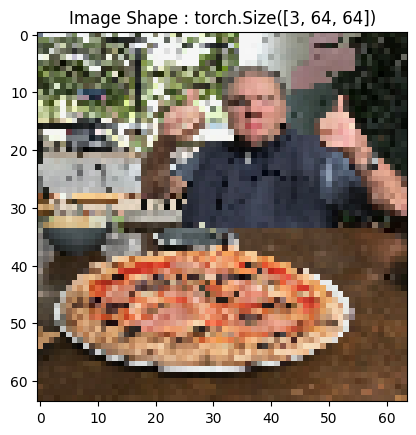

In [291]:
plt.imshow(customimagetransform_withoutbatch.permute(1,2,0))
plt.title(f"Image Shape : {customimagetransform_withoutbatch.size()}")

In [292]:
customimagetransform_withbatchfloat = customimagetransform_withbatch.float()
model3.eval()
with torch.inference_mode():
  customimagepred = model3(customimagetransform_withbatchfloat)

In [293]:
customimagepred

tensor([[ 1.4947, -3.5392, -2.0698]])

In [294]:
customimagesoftmax = torch.softmax(customimagepred , dim=1)
customimagepredlabel = torch.argmax(customimagesoftmax , dim=1)

In [295]:
customimagepredlabel

tensor([0])

In [296]:
customimagepredclass = class_names[customimagepredlabel]
customimagepredclass

'pizza'

In [ ]:
#things done till now
# reducing underfitting with the same model using:
# 1 adam optimiser with learning rate of 0.001
# 2 doubling the hidden units
# 3 training the model with 20 epochs
# 4 doubling the data

#after performing all these things the model is still not giving good accuracy